
In this notebook, we work on the dataset regarding real estate price forecasting in Egypt. 

---

We aim to create an accurate prediction of real estate prices in the future by exploring the data and using time series models.


In [ ]:
# !pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 8.5 MB/s 
     |████████████████████████████████| 9.9 MB 41.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

from scipy import stats
from scipy.stats import norm
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

#from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
%pip install --upgrade category_encoders 
import category_encoders as ce
from yellowbrick.regressor import ResidualsPlot

!pip install pystan~=2.14
!pip install fbprophet



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 773 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 94 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.6 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638409 sha256=763e4e25d7bc94935bb228808787e72206eb51bf4d08e83c84dd89393f969a6e
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    U

importing the data

In [2]:
df = pd.read_csv("PriceForecData.csv", encoding='cp1252') # Read CSV into dataframe

In [3]:
df

,year,Month,% increase,inflation,USD TO EGP,unemployment,month/year
0,2022,10,12.99,0.0258,24.0714,7.40,Oct-22
1,2022,9,-6.06,0.0155,19.2922,7.40,Sep-22
2,2022,8,2.02,0.0088,19.0994,7.40,Aug-22
3,2022,7,7.00,0.0131,18.8289,7.40,Jul-22
4,2022,6,-8.02,-0.0015,18.6483,7.40,Jun-22
...,...,...,...,...,...,...,...
118,2012,11,-14.95,-0.0131,6.1037,12.60,Nov-12
119,2012,10,-3.75,0.0079,6.1011,12.60,Oct-12
120,2012,9,1.30,0.0120,6.0976,12.60,Sep-12
121,2012,8,16.79,0.0117,6.0835,12.60,Aug-12


#Data visualization

In [4]:
df

,year,Month,% increase,inflation,USD TO EGP,unemployment,month/year
0,2022,10,12.99,0.0258,24.0714,7.40,Oct-22
1,2022,9,-6.06,0.0155,19.2922,7.40,Sep-22
2,2022,8,2.02,0.0088,19.0994,7.40,Aug-22
3,2022,7,7.00,0.0131,18.8289,7.40,Jul-22
4,2022,6,-8.02,-0.0015,18.6483,7.40,Jun-22
...,...,...,...,...,...,...,...
118,2012,11,-14.95,-0.0131,6.1037,12.60,Nov-12
119,2012,10,-3.75,0.0079,6.1011,12.60,Oct-12
120,2012,9,1.30,0.0120,6.0976,12.60,Sep-12
121,2012,8,16.79,0.0117,6.0835,12.60,Aug-12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          123 non-null    int64  
 1   Month         123 non-null    int64  
 2   % increase    123 non-null    float64
 3   inflation     123 non-null    float64
 4   USD TO EGP    123 non-null    float64
 5   unemployment  123 non-null    object 
 6   month/year    123 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 6.9+ KB


In [6]:
df['USD TO EGP'].describe()

count    123.000000
mean      12.994125
std        4.907880
min        6.064600
25%        7.517850
50%       15.658300
75%       17.600150
max       24.071400
Name: USD TO EGP, dtype: float64

In [7]:
df['unemployment'].describe()

count      123
unique      11
top       9.33
freq        12
Name: unemployment, dtype: object

In [8]:
df['% increase'].describe()

count    123.000000
mean       1.432520
std        9.294783
min      -29.590000
25%       -3.860000
50%        1.420000
75%        6.470000
max       26.270000
Name: % increase, dtype: float64

In [9]:
df['inflation'].describe()

count    123.000000
mean       0.009626
std        0.011631
min       -0.033900
25%        0.001600
50%        0.008800
75%        0.015600
max        0.048500
Name: inflation, dtype: float64

#Data Cleaning

Calculating the date


In [10]:
df

,year,Month,% increase,inflation,USD TO EGP,unemployment,month/year
0,2022,10,12.99,0.0258,24.0714,7.40,Oct-22
1,2022,9,-6.06,0.0155,19.2922,7.40,Sep-22
2,2022,8,2.02,0.0088,19.0994,7.40,Aug-22
3,2022,7,7.00,0.0131,18.8289,7.40,Jul-22
4,2022,6,-8.02,-0.0015,18.6483,7.40,Jun-22
...,...,...,...,...,...,...,...
118,2012,11,-14.95,-0.0131,6.1037,12.60,Nov-12
119,2012,10,-3.75,0.0079,6.1011,12.60,Oct-12
120,2012,9,1.30,0.0120,6.0976,12.60,Sep-12
121,2012,8,16.79,0.0117,6.0835,12.60,Aug-12


In [11]:
df['new_year'] = df['year'].apply(str) + '-' + df['Month'].apply(str)

In [12]:
df['year2'] = pd.to_datetime(df['new_year'], format='%Y-%m')

In [13]:
df.drop('year', axis=1, inplace=True)

In [14]:
df.drop('Month', axis=1, inplace=True)

In [15]:
df.drop('month/year', axis=1, inplace=True)

In [16]:
df.drop('new_year', axis=1, inplace=True)

In [17]:
df['unemployment']=df['unemployment'].astype(float)

In [18]:
df

,% increase,inflation,USD TO EGP,unemployment,year2
0,12.99,0.0258,24.0714,7.4,2022-10-01
1,-6.06,0.0155,19.2922,7.4,2022-09-01
2,2.02,0.0088,19.0994,7.4,2022-08-01
3,7.00,0.0131,18.8289,7.4,2022-07-01
4,-8.02,-0.0015,18.6483,7.4,2022-06-01
...,...,...,...,...,...
118,-14.95,-0.0131,6.1037,12.6,2012-11-01
119,-3.75,0.0079,6.1011,12.6,2012-10-01
120,1.30,0.0120,6.0976,12.6,2012-09-01
121,16.79,0.0117,6.0835,12.6,2012-08-01


In [19]:
df = df.dropna()

In [ ]:
# columns=df.columns
# k=1
# plt.figure(figsize=(25,300))
# for i in columns:
#     for j in columns:
#         plt.subplot(64,4,k)
#         sns.scatterplot(data=df,x=i,y=j,size=5)
#         k+=1

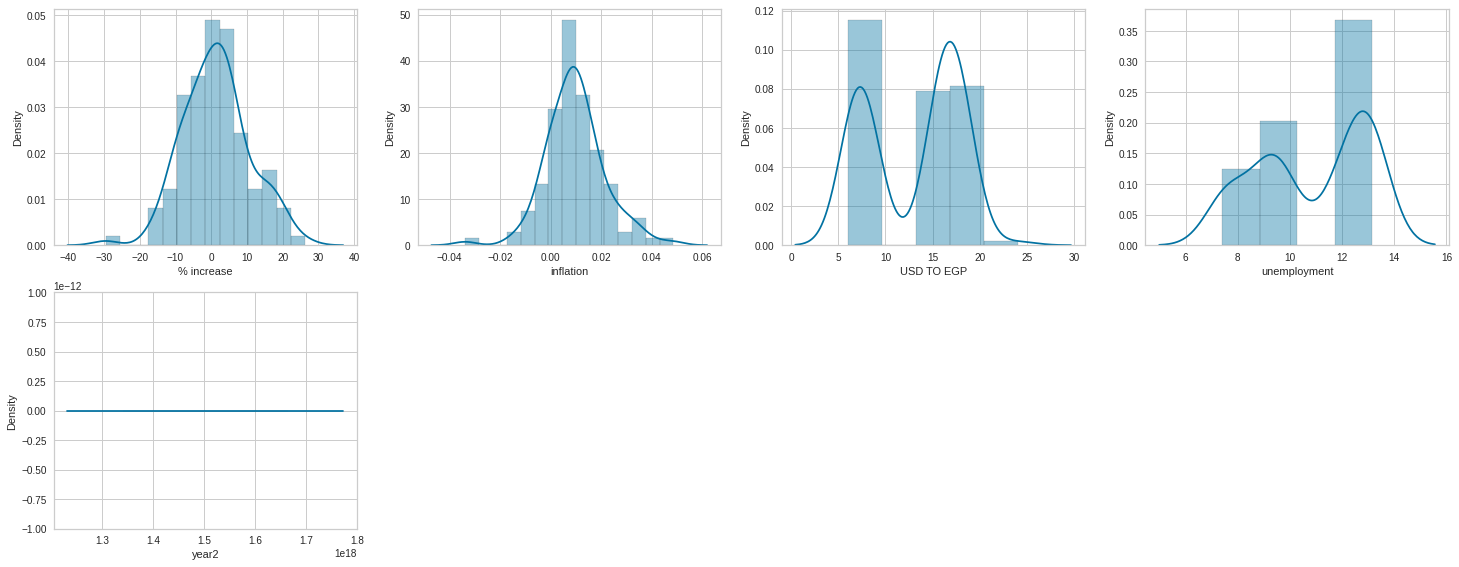

In [21]:
k=1
plt.figure(figsize=(25,20))
for i in columns:
    plt.subplot(4,4,k)
    sns.distplot(df[i])
    k+=1

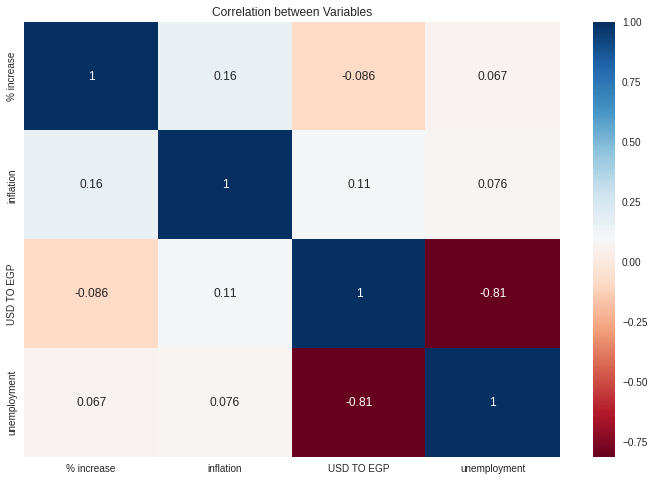

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),cmap='RdBu', annot = True)
plt.title("Correlation between Variables")
plt.show()

#MODEL

In [23]:
df

,% increase,inflation,USD TO EGP,unemployment,year2
0,12.99,0.0258,24.0714,7.4,2022-10-01
1,-6.06,0.0155,19.2922,7.4,2022-09-01
2,2.02,0.0088,19.0994,7.4,2022-08-01
3,7.00,0.0131,18.8289,7.4,2022-07-01
4,-8.02,-0.0015,18.6483,7.4,2022-06-01
...,...,...,...,...,...
118,-14.95,-0.0131,6.1037,12.6,2012-11-01
119,-3.75,0.0079,6.1011,12.6,2012-10-01
120,1.30,0.0120,6.0976,12.6,2012-09-01
121,16.79,0.0117,6.0835,12.6,2012-08-01


In [24]:
# Simplify column names
df.columns = ['% increase','inflation', 'USD TO EGP', 'unemployment','year2']

targets = ['% increase']
features = [feature for feature in df.columns if feature not in targets]
df.head()

,% increase,inflation,USD TO EGP,unemployment,year2
0,12.99,0.0258,24.0714,7.4,2022-10-01
1,-6.06,0.0155,19.2922,7.4,2022-09-01
2,2.02,0.0088,19.0994,7.4,2022-08-01
3,7.00,0.0131,18.8289,7.4,2022-07-01
4,-8.02,-0.0015,18.6483,7.4,2022-06-01


In [25]:
downsample = df[['% increase','inflation', 'USD TO EGP', 'unemployment','year2']].resample('M', on='year2').mean().reset_index(drop=False)

df = downsample.copy()

In [26]:
df

,year2,% increase,inflation,USD TO EGP,unemployment
0,2012-07-31,4.45,0.0038,6.0646,12.6
1,2012-08-31,16.79,0.0117,6.0835,12.6
2,2012-09-30,1.30,0.0120,6.0976,12.6
3,2012-10-31,-3.75,0.0079,6.1011,12.6
4,2012-11-30,-14.95,-0.0131,6.1037,12.6
...,...,...,...,...,...
119,2022-06-30,-8.02,-0.0015,18.6483,7.4
120,2022-07-31,7.00,0.0131,18.8289,7.4
121,2022-08-31,2.02,0.0088,19.0994,7.4
122,2022-09-30,-6.06,0.0155,19.2922,7.4


TimeSeries univariante

In [27]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = df['year2']
y = df['% increase']

folds = TimeSeriesSplit(n_splits=N_SPLITS)

In [28]:
train_size = int(0.85 * len(df))
test_size = len(df) - train_size

univariate_df = df[['year2', '% increase']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

105 19


Prophet model

In [29]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import math

# from fbprophet import Prophet


# # Train the model
# model = Prophet()
# model.fit(train)

# # x_valid = model.make_future_dataframe(periods=test_size, freq='w')

# # Predict on valid set
# y_pred = model.predict(x_valid)

# # Calcuate metrics
# score_mae = mean_absolute_error(y_valid, y_pred.tail(test_size)['yhat'])
# score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred.tail(test_size)['yhat']))

# print( 'RMSE: {}'.format(score_rmse))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE: 10.333987813756318


In [30]:
# from statsmodels.tsa.arima_model import ARIMA

# # Fit model
# model = ARIMA(y_train, order=(1,1,1))
# model_fit = model.fit()

# # Prediction with ARIMA
# y_pred, se, conf = model_fit.forecast(19)

# # Calcuate metrics
# score_mae = mean_absolute_error(y_valid, y_pred)
# score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

# print( 'RMSE: {}'.format(score_rmse))

Auto Arima model

In [31]:
# from statsmodels.tsa.arima_model import ARIMA
# import pmdarima as pm

# model = pm.auto_arima(y_train, start_p=1, start_q=1,
#                       test='adf',       # use adftest to find optimal 'd'
#                       max_p=3, max_q=3, # maximum p and q
#                       m=1,              # frequency of series
#                       d=None,           # let model determine 'd'
#                       seasonal=False,   # No Seasonality
#                       start_P=0, 
#                       D=0, 
#                       trace=True,
#                       error_action='ignore',  
#                       suppress_warnings=True, 
#                       stepwise=True)

# print(model.summary())

In [32]:
# model.plot_diagnostics(figsize=(16,8))
# plt.show()

In [33]:
# from sklearn.preprocessing import MinMaxScaler

# data = univariate_df.filter(['y'])
# #Convert the dataframe to a numpy array
# dataset = data.values

# scaler = MinMaxScaler(feature_range=(-1, 0))
# scaled_data = scaler.fit_transform(dataset)

# scaled_data[:10]

array([[-0.39061941],
       [-0.16970999],
       [-0.44701038],
       [-0.53741497],
       [-0.73791622],
       [-0.0952381 ],
       [-0.75832438],
       [-0.18224132],
       [-0.38274257],
       [-0.7622628 ]])

In [34]:
# look_back = 10
# # Split into train and test sets
# train, test = scaled_data[:train_size-look_back,:], scaled_data[train_size-look_back:,:]

# def create_dataset(dataset, look_back=1):
#     X, Y = [], []
#     for i in range(look_back, len(dataset)):
#         a = dataset[i-look_back:i, 0]
#         X.append(a)
#         Y.append(dataset[i, 0])
#     return np.array(X), np.array(Y)

# x_train, y_train = create_dataset(train, look_back)
# x_test, y_test = create_dataset(test, look_back)

# # reshape input to be [samples, time steps, features]
# x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
# x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

# print(len(x_train), len(x_test))

85 19


LSTM model

In [35]:
# from keras.models import Sequential
# from keras.layers import Dense, LSTM

# #Build the LSTM model
# model = Sequential()
# model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
# model.add(LSTM(64, return_sequences=False))
# model.add(Dense(25))
# model.add(Dense(1))

# # Compile the model
# model.compile(optimizer='SGD', loss='mean_squared_error')

# #Train the model
# model.fit(x_train, y_train, batch_size=1, epochs=50, validation_data=(x_test, y_test))

# model.summary()

In [36]:
# # Lets predict with the model
# train_predict = model.predict(x_train)
# test_predict = model.predict(x_test)

# # invert predictions
# train_predict = scaler.inverse_transform(train_predict)
# y_train = scaler.inverse_transform([y_train])

# test_predict = scaler.inverse_transform(test_predict)
# y_test = scaler.inverse_transform([y_test])

# # Get the root mean squared error (RMSE) and MAE
# score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
# score_mae = mean_absolute_error(y_test[0], test_predict[:,0])
# print('RMSE: {}'.format(score_rmse))

In [37]:
df

,year2,% increase,inflation,USD TO EGP,unemployment
0,2012-07-31,4.45,0.0038,6.0646,12.6
1,2012-08-31,16.79,0.0117,6.0835,12.6
2,2012-09-30,1.30,0.0120,6.0976,12.6
3,2012-10-31,-3.75,0.0079,6.1011,12.6
4,2012-11-30,-14.95,-0.0131,6.1037,12.6
...,...,...,...,...,...
119,2022-06-30,-8.02,-0.0015,18.6483,7.4
120,2022-07-31,7.00,0.0131,18.8289,7.4
121,2022-08-31,2.02,0.0088,19.0994,7.4
122,2022-09-30,-6.06,0.0155,19.2922,7.4


TimeSeries multivariate

In [38]:
feature_columns = ['inflation', 'USD TO EGP', 'unemployment']

target_column = ['% increase']

train_size = int(0.85 * len(df))

multivariate_df = df[['year2'] + target_column + feature_columns].copy()
multivariate_df.columns = ['ds', 'y'] + feature_columns

train = multivariate_df.iloc[:train_size, :]
x_train, y_train = pd.DataFrame(multivariate_df.iloc[:train_size, [0,2,3,4]]), pd.DataFrame(multivariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(multivariate_df.iloc[train_size:, [0,2,3,4]]), pd.DataFrame(multivariate_df.iloc[train_size:, 1])

train.head()

,ds,y,inflation,USD TO EGP,unemployment
0,2012-07-31,4.45,0.0038,6.0646,12.6
1,2012-08-31,16.79,0.0117,6.0835,12.6
2,2012-09-30,1.30,0.0120,6.0976,12.6
3,2012-10-31,-3.75,0.0079,6.1011,12.6
4,2012-11-30,-14.95,-0.0131,6.1037,12.6


In [39]:
df

,year2,% increase,inflation,USD TO EGP,unemployment
0,2012-07-31,4.45,0.0038,6.0646,12.6
1,2012-08-31,16.79,0.0117,6.0835,12.6
2,2012-09-30,1.30,0.0120,6.0976,12.6
3,2012-10-31,-3.75,0.0079,6.1011,12.6
4,2012-11-30,-14.95,-0.0131,6.1037,12.6
...,...,...,...,...,...
119,2022-06-30,-8.02,-0.0015,18.6483,7.4
120,2022-07-31,7.00,0.0131,18.8289,7.4
121,2022-08-31,2.02,0.0088,19.0994,7.4
122,2022-09-30,-6.06,0.0155,19.2922,7.4


In [40]:
train.dtypes

ds              datetime64[ns]
y                      float64
inflation              float64
USD TO EGP             float64
unemployment           float64
dtype: object

In [84]:
from fbprophet import Prophet


# Train the model
model = Prophet() 
model.add_regressor('inflation')
model.add_regressor('USD TO EGP')
model.add_regressor('unemployment')

# Fit the model with train set
model.fit(train)

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred['yhat']))

print('MAE: {}'.format(score_mae))
print( 'RMSE: {}'.format(score_rmse))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAE: 6.953170312390346
RMSE: 9.909150908975299


In [42]:
x_valid

,ds,inflation,USD TO EGP,unemployment
105,2021-04-30,0.0089,15.6389,9.33
106,2021-05-31,0.0069,15.6183,9.33
107,2021-06-30,0.0018,15.6389,9.33
108,2021-07-31,0.0087,15.6408,9.33
109,2021-08-31,0.0007,15.6503,9.33
110,2021-09-30,0.0114,15.6599,9.33
111,2021-10-31,0.0150,15.6601,9.33
112,2021-11-30,0.0015,15.6603,9.33
113,2021-12-31,-0.0008,15.6617,9.33
114,2022-01-31,0.0085,15.6608,7.40


#Predicting new values

Create a range of dates between today and the input date

In [43]:
month = 11 # month of prediction
year = 2026 #year of prediction

date = str(year) + "-" + str(month) + "-01"


#df['year2'] = pd.to_datetime(df['new_year'], format='%Y-%m')

dates_range = pd.date_range(start ='2022-11-01',end =date , freq ='M')



In [44]:
dates_range

DatetimeIndex(['2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28',
               '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30',
               '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31',
               '2023-11-30', '2023-12-31', '2024-01-31', '2024-02-29',
               '2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30',
               '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
               '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28',
               '2025-03-31', '2025-04-30', '2025-05-31', '2025-06-30',
               '2025-07-31', '2025-08-31', '2025-09-30', '2025-10-31',
               '2025-11-30', '2025-12-31', '2026-01-31', '2026-02-28',
               '2026-03-31', '2026-04-30', '2026-05-31', '2026-06-30',
               '2026-07-31', '2026-08-31', '2026-09-30', '2026-10-31'],
              dtype='datetime64[ns]', freq='M')

In [45]:
inputs=[]

In [46]:
for i in range(len(dates_range)):
  inputs.append([dates_range[i],0.02581,24.0714,7.40])

In [47]:
inputs

[[Timestamp('2022-11-30 00:00:00', freq='M'), 0.02581, 24.0714, 7.4],
 [Timestamp('2022-12-31 00:00:00', freq='M'), 0.02581, 24.0714, 7.4],
 [Timestamp('2023-01-31 00:00:00', freq='M'), 0.02581, 24.0714, 7.4],
 [Timestamp('2023-02-28 00:00:00', freq='M'), 0.02581, 24.0714, 7.4],
 [Timestamp('2023-03-31 00:00:00', freq='M'), 0.02581, 24.0714, 7.4],
 [Timestamp('2023-04-30 00:00:00', freq='M'), 0.02581, 24.0714, 7.4],
 [Timestamp('2023-05-31 00:00:00', freq='M'), 0.02581, 24.0714, 7.4],
 [Timestamp('2023-06-30 00:00:00', freq='M'), 0.02581, 24.0714, 7.4],
 [Timestamp('2023-07-31 00:00:00', freq='M'), 0.02581, 24.0714, 7.4],
 [Timestamp('2023-08-31 00:00:00', freq='M'), 0.02581, 24.0714, 7.4],
 [Timestamp('2023-09-30 00:00:00', freq='M'), 0.02581, 24.0714, 7.4],
 [Timestamp('2023-10-31 00:00:00', freq='M'), 0.02581, 24.0714, 7.4],
 [Timestamp('2023-11-30 00:00:00', freq='M'), 0.02581, 24.0714, 7.4],
 [Timestamp('2023-12-31 00:00:00', freq='M'), 0.02581, 24.0714, 7.4],
 [Timestamp('2024-01

In [48]:
Xnew = pd.DataFrame(inputs)

In [49]:
Xnew.columns = ['ds','inflation','USD TO EGP','unemployment']

In [50]:
Xnew

,ds,inflation,USD TO EGP,unemployment
0,2022-11-30,0.02581,24.0714,7.4
1,2022-12-31,0.02581,24.0714,7.4
2,2023-01-31,0.02581,24.0714,7.4
3,2023-02-28,0.02581,24.0714,7.4
4,2023-03-31,0.02581,24.0714,7.4
5,2023-04-30,0.02581,24.0714,7.4
6,2023-05-31,0.02581,24.0714,7.4
7,2023-06-30,0.02581,24.0714,7.4
8,2023-07-31,0.02581,24.0714,7.4
9,2023-08-31,0.02581,24.0714,7.4


In [51]:
new  = model.predict(Xnew)

In [52]:
new

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,USD TO EGP,USD TO EGP_lower,USD TO EGP_upper,additive_terms,...,unemployment,unemployment_lower,unemployment_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-30,-3.458778,-15.337239,4.518362,-3.458779,-3.458778,-0.02657,-0.02657,-0.02657,-2.209445,...,1.889737,1.889737,1.889737,-5.281252,-5.281252,-5.281252,0.0,0.0,0.0,-5.668223
1,2022-12-31,-3.525883,-10.661792,9.572924,-3.525883,-3.525883,-0.02657,-0.02657,-0.02657,3.757117,...,1.889737,1.889737,1.889737,0.685310,0.685310,0.685310,0.0,0.0,0.0,0.231234
2,2023-01-31,-3.592987,-16.171647,3.813165,-3.592988,-3.592987,-0.02657,-0.02657,-0.02657,-2.654855,...,1.889737,1.889737,1.889737,-5.726662,-5.726662,-5.726662,0.0,0.0,0.0,-6.247843
3,2023-02-28,-3.653598,-5.576427,14.549788,-3.653598,-3.653598,-0.02657,-0.02657,-0.02657,7.981043,...,1.889737,1.889737,1.889737,4.909236,4.909236,4.909236,0.0,0.0,0.0,4.327445
4,2023-03-31,-3.720703,-10.770610,9.624529,-3.720703,-3.720702,-0.02657,-0.02657,-0.02657,3.333239,...,1.889737,1.889737,1.889737,0.261433,0.261433,0.261433,0.0,0.0,0.0,-0.387463
5,2023-04-30,-3.785642,-12.817613,6.709042,-3.785643,-3.785642,-0.02657,-0.02657,-0.02657,0.395873,...,1.889737,1.889737,1.889737,-2.675933,-2.675933,-2.675933,0.0,0.0,0.0,-3.389769
6,2023-05-31,-3.852747,-18.193950,1.390665,-3.852747,-3.852747,-0.02657,-0.02657,-0.02657,-5.000792,...,1.889737,1.889737,1.889737,-8.072599,-8.072599,-8.072599,0.0,0.0,0.0,-8.853539
7,2023-06-30,-3.917687,-1.133773,18.424530,-3.917687,-3.917686,-0.02657,-0.02657,-0.02657,12.604305,...,1.889737,1.889737,1.889737,9.532498,9.532498,9.532498,0.0,0.0,0.0,8.686618
8,2023-07-31,-3.984791,-4.781574,14.640793,-3.984792,-3.984791,-0.02657,-0.02657,-0.02657,9.341726,...,1.889737,1.889737,1.889737,6.269919,6.269919,6.269919,0.0,0.0,0.0,5.356934
9,2023-08-31,-4.051896,-6.004766,13.116549,-4.051897,-4.051895,-0.02657,-0.02657,-0.02657,7.125061,...,1.889737,1.889737,1.889737,4.053254,4.053254,4.053254,0.0,0.0,0.0,3.073165


In [53]:
new['yhat']

0     -5.668223
1      0.231234
2     -6.247843
3      4.327445
4     -0.387463
5     -3.389769
6     -8.853539
7      8.686618
8      5.356934
9      3.073165
10    -5.164694
11    -1.394598
12    -6.419912
13    -0.538173
14    -6.994508
15     3.610679
16    -0.900099
17    -3.926100
18    -9.825364
19     7.549609
20     4.594947
21     2.484252
22    -5.876353
23    -2.218659
24    -7.319018
25    -1.397408
26    -7.910537
27     2.801207
28    -1.782276
29    -4.805202
30   -10.564051
31     6.879856
32     3.799270
33     1.628900
34    -6.697015
35    -2.998709
36    -8.076328
37    -2.163579
38    -8.661601
39     1.985933
40    -2.665654
41    -5.680669
42   -11.294246
43     6.204753
44     2.999068
45     0.770959
46    -7.514016
47    -3.778215
Name: yhat, dtype: float64

In [54]:
x = new['yhat'].sum()

In [56]:
x

94.128994006989274

In [57]:
price = 1000000 #price of prediction

price = price + price * x/ 100

In [58]:
price

1941289.9400698927

#Prediction VS Actual


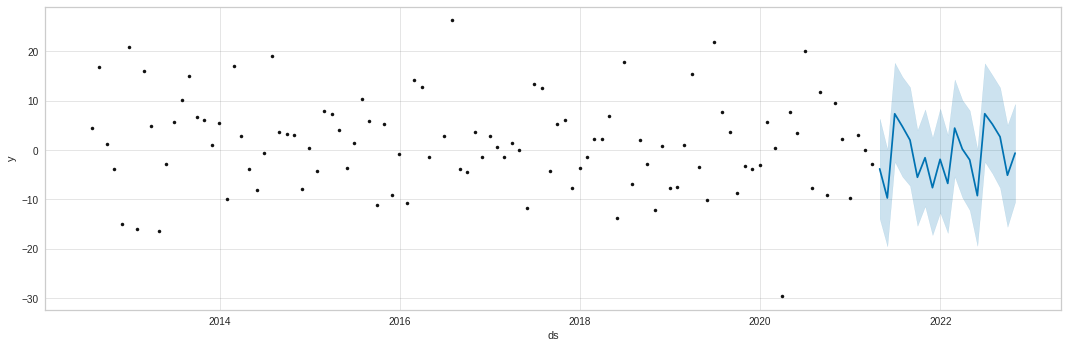

In [75]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(y_pred,
                 ax=ax)
plt.show()

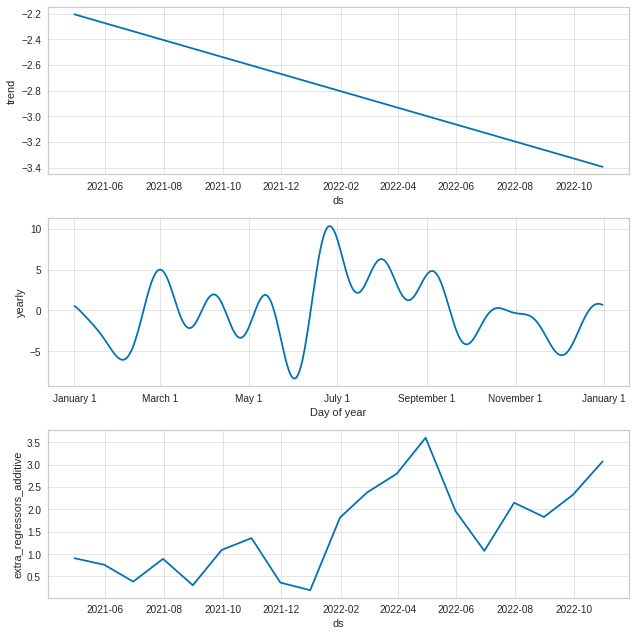

In [76]:
fig = model.plot_components(y_pred)

In [68]:
y_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,USD TO EGP,USD TO EGP_lower,USD TO EGP_upper,additive_terms,...,unemployment,unemployment_lower,unemployment_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-04-30,-2.205439,-14.052291,6.317327,-2.205439,-2.205439,-0.007620,-0.007620,-0.007620,-1.600993,...,0.953035,0.953035,0.953035,-2.508998,-2.508998,-2.508998,0.0,0.0,0.0,-3.806432
1,2021-05-31,-2.272543,-19.561975,0.142655,-2.272543,-2.272543,-0.007574,-0.007574,-0.007574,-7.440065,...,0.953035,0.953035,0.953035,-8.200742,-8.200742,-8.200742,0.0,0.0,0.0,-9.712608
2,2021-06-30,-2.337483,-3.129089,16.542921,-2.337483,-2.337483,-0.007620,-0.007620,-0.007620,9.692931,...,0.953035,0.953035,0.953035,9.308105,9.308105,9.308105,0.0,0.0,0.0,7.355448
3,2021-07-31,-2.404588,-5.666419,14.213849,-2.404588,-2.404588,-0.007625,-0.007625,-0.007625,7.187887,...,0.953035,0.953035,0.953035,6.294624,6.294624,6.294624,0.0,0.0,0.0,4.783299
4,2021-08-31,-2.471692,-8.096066,11.201830,-2.471692,-2.471692,-0.007646,-0.007646,-0.007646,4.495102,...,0.953035,0.953035,0.953035,4.191357,4.191357,4.191357,0.0,0.0,0.0,2.023410
5,2021-09-30,-2.536632,-15.546248,4.486344,-2.536632,-2.536632,-0.007668,-0.007668,-0.007668,-2.977442,...,0.953035,0.953035,0.953035,-4.069617,-4.069617,-4.069617,0.0,0.0,0.0,-5.514074
6,2021-10-31,-2.603737,-11.643924,7.690316,-2.603737,-2.603736,-0.007668,-0.007668,-0.007668,1.053241,...,0.953035,0.953035,0.953035,-0.304207,-0.304207,-0.304207,0.0,0.0,0.0,-1.550495
7,2021-11-30,-2.668676,-17.068056,2.323231,-2.668677,-2.668676,-0.007669,-0.007669,-0.007669,-4.954214,...,0.953035,0.953035,0.953035,-5.316886,-5.316886,-5.316886,0.0,0.0,0.0,-7.622890
8,2021-12-31,-2.735781,-11.472712,7.323031,-2.735781,-2.735781,-0.007672,-0.007672,-0.007672,0.856156,...,0.953035,0.953035,0.953035,0.662968,0.662968,0.662968,0.0,0.0,0.0,-1.879625
9,2022-01-31,-2.802886,-17.133276,2.344311,-2.802886,-2.802885,-0.007670,-0.007670,-0.007670,-3.952767,...,1.889737,1.889737,1.889737,-5.767949,-5.767949,-5.767949,0.0,0.0,0.0,-6.755652


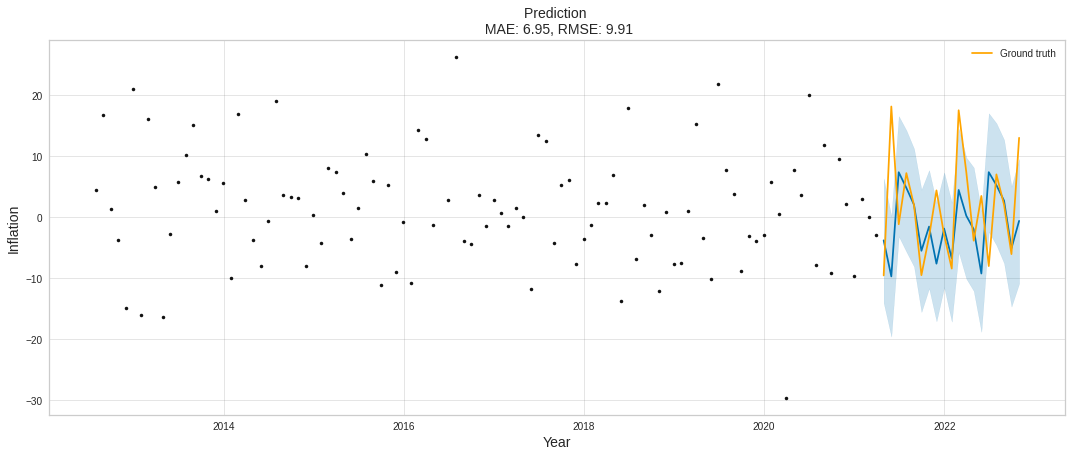

In [72]:
# f, ax = plt.subplots(1)
# f.set_figheight(6)
# f.set_figwidth(15)

# model.plot(y_pred, ax=ax)
# sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

# ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
# ax.set_xlabel(xlabel='Year', fontsize=14)
# ax.set_ylabel(ylabel='Inflation', fontsize=14)

# plt.show()